In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


## Understanding the Dataset
1. GRE: Graduate Record Examination Scores (out of 340)
2. TOEFL: Test Of English as a Foreign Language: Scores (out of 120)
3. University Rating (out of 5)
4. Statement of Purpose and Letter of Recommendation Strength (out of 5)
5. Undergraduate GPA (out of 10)
6. Research Experience (either 0 or 1)
7. Chance of Admit (ranging from 0 to 1)

In [19]:
#there are no qualititative features in this dataset. They are all quantitative(int of float data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [3]:
#dropping the serial no feature, it's practically useless.

df.drop("Serial No.",axis = 1, inplace = True)

In [5]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [10]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [15]:
df.isnull().sum()  # no null values

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [17]:
duplicate = df[df.duplicated(keep='last')]  # no duplicate values 
duplicate

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


## OBSERVATIONS
1. There are no null values
2. Theres are no duplicate values


# VISUALIZATIONS

### Checking the distribution for the target variable(Chance of Admit)


<AxesSubplot:xlabel='Chance of Admit '>

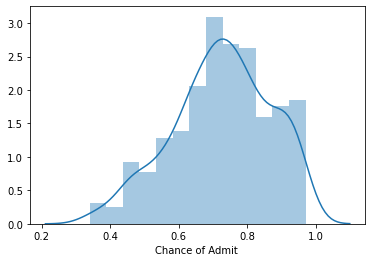

In [16]:
sns.distplot(df["Chance of Admit "])

In [ ]:
# The distribution is skewed to the left meaning the mean and median will be less than the mode.

In [22]:
Admit_mode = df["Chance of Admit "].mode()
Admit_mode

0    0.64
dtype: float64

In [21]:
Admit_median = df["Chance of Admit "].median()
Admit_median

0.73

In [23]:
Admit_mean = df["Chance of Admit "].mean()
Admit_mean

0.72435

In [ ]:
# BUT THE DEFINITION OF LEFT SKEWNESS IS DIFFERENT FROM WHAT I AM GETTING, COULD TGERE BE SOMETHING WRONG?
# The mode is supposed to be greater than the mean and median but the opposite is the case

array([[<AxesSubplot:title={'center':'Chance of Admit '}>]], dtype=object)

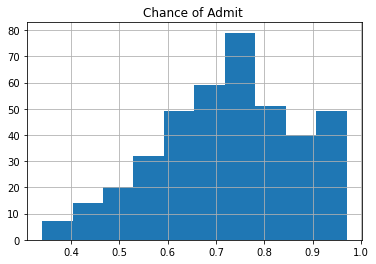

In [20]:
df.hist("Chance of Admit ")

### GRE Score visualization

<AxesSubplot:xlabel='GRE Score'>

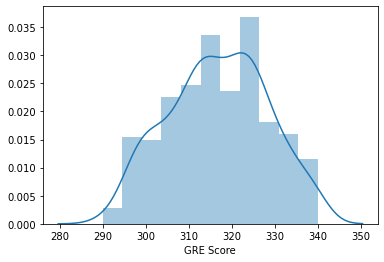

In [9]:
sns.distplot(df["GRE Score"])   #The distribution looks like a normal distribution meaning the data near the mean are more frequent in occurrence than data far from the mean.

In [14]:
GRE_mode = df["GRE Score"].median()
GRE_mode

317.0

In [15]:
GRE_mean = df["GRE Score"].mean()
GRE_mean

316.8075

In [ ]:
# The mean(average) of the dataset is 316.8075 and the mode is 317.... This means that the distribution is NORMAL

### TOEFL Score visualization

<AxesSubplot:xlabel='TOEFL Score'>

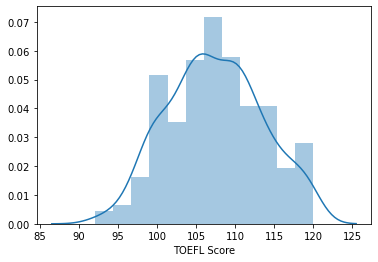

In [17]:
sns.distplot(df["TOEFL Score"])

In [18]:
TOEFL_mean = df["TOEFL Score"].mean()
TOEFL_mean

107.41

In [21]:
TOEFL_mode = df["TOEFL Score"].median()
TOEFL_mode

107.0

In [ ]:
# The TOEFL Score is a normal distribution.